#Машинное обучение (семинары).

##Урок 3. Классификация на практике

Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.    

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.   

Создайте модель линейной регрессии, которая бы оценивала лояльность пользователей к отклику.    

Пояснения к признакам набора данных:    

• TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);    
• AGE — возраст клиента;    
• SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);    
• SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);    
• GENDER — пол клиента (1 — мужчина, 0 — женщина);   
• CHILD_TOTAL — количество детей клиента;    
• DEPENDANTS — количество иждивенцев клиента;    
• PERSONAL_INCOME — личный доход клиента (в рублях);    
• LOAN_NUM_TOTAL — количество ссуд клиента;    
• LOAN_NUM_CLOSED — количество погашенных ссуд клиента.  
• LOAN_DLQ_NUM - Количество просрочек

### Импорт библиотек

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

Для решения задачи прогнозирования отклика клиентов на маркетинговое предложение с помощью линейной регрессии, выполним следующие шаги:

1. **Загрузка данных** и первичный анализ.
2. **Предобработка данных**: удаление пропусков, преобразование категориальных признаков.
3. **Разделение данных** на обучающую и тестовую выборки.
4. Построение **модели логистической регрессии** (так как целевая переменная бинарная).
5. Оценка **качества модели** с помощью метрик.

### Загрузка данных и первичный анализ. Предобработка данных.

In [13]:
# Подключение к Google Диску и загрузка данных
file_path = 'https://drive.google.com/uc?export=download&id=13k5LI6gdVuTVMUQpZ9vzWjg-q5_tZwe2'
# Загрузка данных
data = pd.read_csv(file_path)
data.head()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_DLQ_NUM,TARGET
0,49,1,0,1,2,1,5000.0,1,1,2,0
1,32,1,0,1,3,3,12000.0,1,1,1,0
2,52,1,0,1,4,0,9000.0,2,1,0,0
3,39,1,0,1,1,1,25000.0,1,1,3,0
4,30,1,0,0,0,0,12000.0,2,1,2,0


In [14]:
# Первичный анализ данных
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AGE                15223 non-null  int64  
 1   SOCSTATUS_WORK_FL  15223 non-null  int64  
 2   SOCSTATUS_PENS_FL  15223 non-null  int64  
 3   GENDER             15223 non-null  int64  
 4   CHILD_TOTAL        15223 non-null  int64  
 5   DEPENDANTS         15223 non-null  int64  
 6   PERSONAL_INCOME    15223 non-null  float64
 7   LOAN_NUM_TOTAL     15223 non-null  int64  
 8   LOAN_NUM_CLOSED    15223 non-null  int64  
 9   LOAN_DLQ_NUM       15223 non-null  int64  
 10  TARGET             15223 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 1.3 MB
None
                AGE  SOCSTATUS_WORK_FL  SOCSTATUS_PENS_FL        GENDER  \
count  15223.000000       15223.000000       15223.000000  15223.000000   
mean      40.406096           0.909610           0.134468    

Данные о клиентах банка хорошо структурированы, и все признаки уже находятся в числовом формате. Пропусков в данных нет, поэтому можно сразу приступать к построению модели. Поскольку целевая переменная (`TARGET`) является бинарной, лучше всего использовать логистическую регрессию.

### Построение простой модели без стандартизации и не балансированной

In [15]:
# Определение признаков и целевой переменной
X = data.drop(columns=['TARGET'])  # Удаление целевой переменной
y = data['TARGET']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
# Построение простой модели логистической регрессии
model = LogisticRegression(max_iter=3000)

model.fit(X_train, y_train)

# Оценка качества модели на тестовой выборке
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Метрики качества модели
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
mae_test = mean_absolute_error(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"MAE (Test): {mae_test:.4f}")

# Полный отчет по классификации
print("Classification Report:\n", classification_report(y_test, y_pred))

# Сохраняем данные.
results = {
    'Model': ['Simple'],
    'Accuracy': [accuracy],
    'MAE (Test)': [mae_test],
    'ROC-AUC': [roc_auc]
}
score_data = pd.DataFrame(results)

Accuracy: 0.8808
ROC-AUC: 0.6390
MAE (Test): 0.2038
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94      2683
           1       0.00      0.00      0.00       362

    accuracy                           0.88      3045
   macro avg       0.44      0.50      0.47      3045
weighted avg       0.78      0.88      0.83      3045



**Метрики качества**:
   - `Accuracy` показывает общую точность модели.
   - `ROC-AUC` учитывает баланс между `Precision` и `Recall` для каждого класса и помогает понять, насколько хорошо модель отличает класс `1` (отклик) от класса `0`.

**Проверка распределения целевой переменной (TARGET)**:
   - Печать количества откликов (`1`) и отсутствия откликов (`0`). Это поможет понять, сбалансированы ли классы.

In [17]:
# Проверка распределения целевой переменной
print(data['TARGET'].value_counts())

TARGET
0    13411
1     1812
Name: count, dtype: int64


**Анализ распределения целевой переменной (`TARGET`):**    

- **Класс `0` (не откликнулись)**: 13,411 случаев (примерно 88% данных).
- **Класс `1` (откликнулись)**: 1,812 случаев (примерно 12% данных).

Данные сильно **несбалансированы**: количество клиентов, не откликнувшихся на предложение (класс `0`), значительно превышает количество клиентов, откликнувшихся (класс `1`). Это создает проблемы при обучении модели, так как модель склонна предсказывать класс `0` чаще, чем класс `1`.   
    
Добавление параметра `class_weight='balanced'` в модель логистической регрессии поможет учесть дисбаланс классов, автоматически назначив больший вес менее представленному классу.    

### Построение модели с балансированием и страндартизацией.

In [18]:
from sklearn.preprocessing import StandardScaler

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Построение модели логистической регрессии
model = LogisticRegression(max_iter=2000, class_weight='balanced')
model.fit(X_train_scaled, y_train)

# Оценка качества модели на тестовой выборке
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Метрики качества модели
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
mae_test = mean_absolute_error(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"MAE (Test): {mae_test:.4f}")

# Полный отчет по классификации
print("Classification Report:\n", classification_report(y_test, y_pred))

# Сохраняем данные.
results = {
    'Model': ['Balanced & Scaled'],
    'Accuracy': [accuracy],
    'MAE (Test)': [mae_test],
    'ROC-AUC': [roc_auc]
}
new_data = pd.DataFrame(results)
score_data = pd.concat([score_data, new_data], ignore_index=True)

Accuracy: 0.5869
ROC-AUC: 0.6429
MAE (Test): 0.4634
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.58      0.71      2683
           1       0.17      0.64      0.27       362

    accuracy                           0.59      3045
   macro avg       0.55      0.61      0.49      3045
weighted avg       0.83      0.59      0.66      3045




  **`class_weight='balanced'`** автоматически определяет вес для каждого класса на основе их частоты в обучающей выборке. Это помогает модели уделять больше внимания классу `1`, который встречается реже, и улучшает качество предсказания.

### Визуализация.

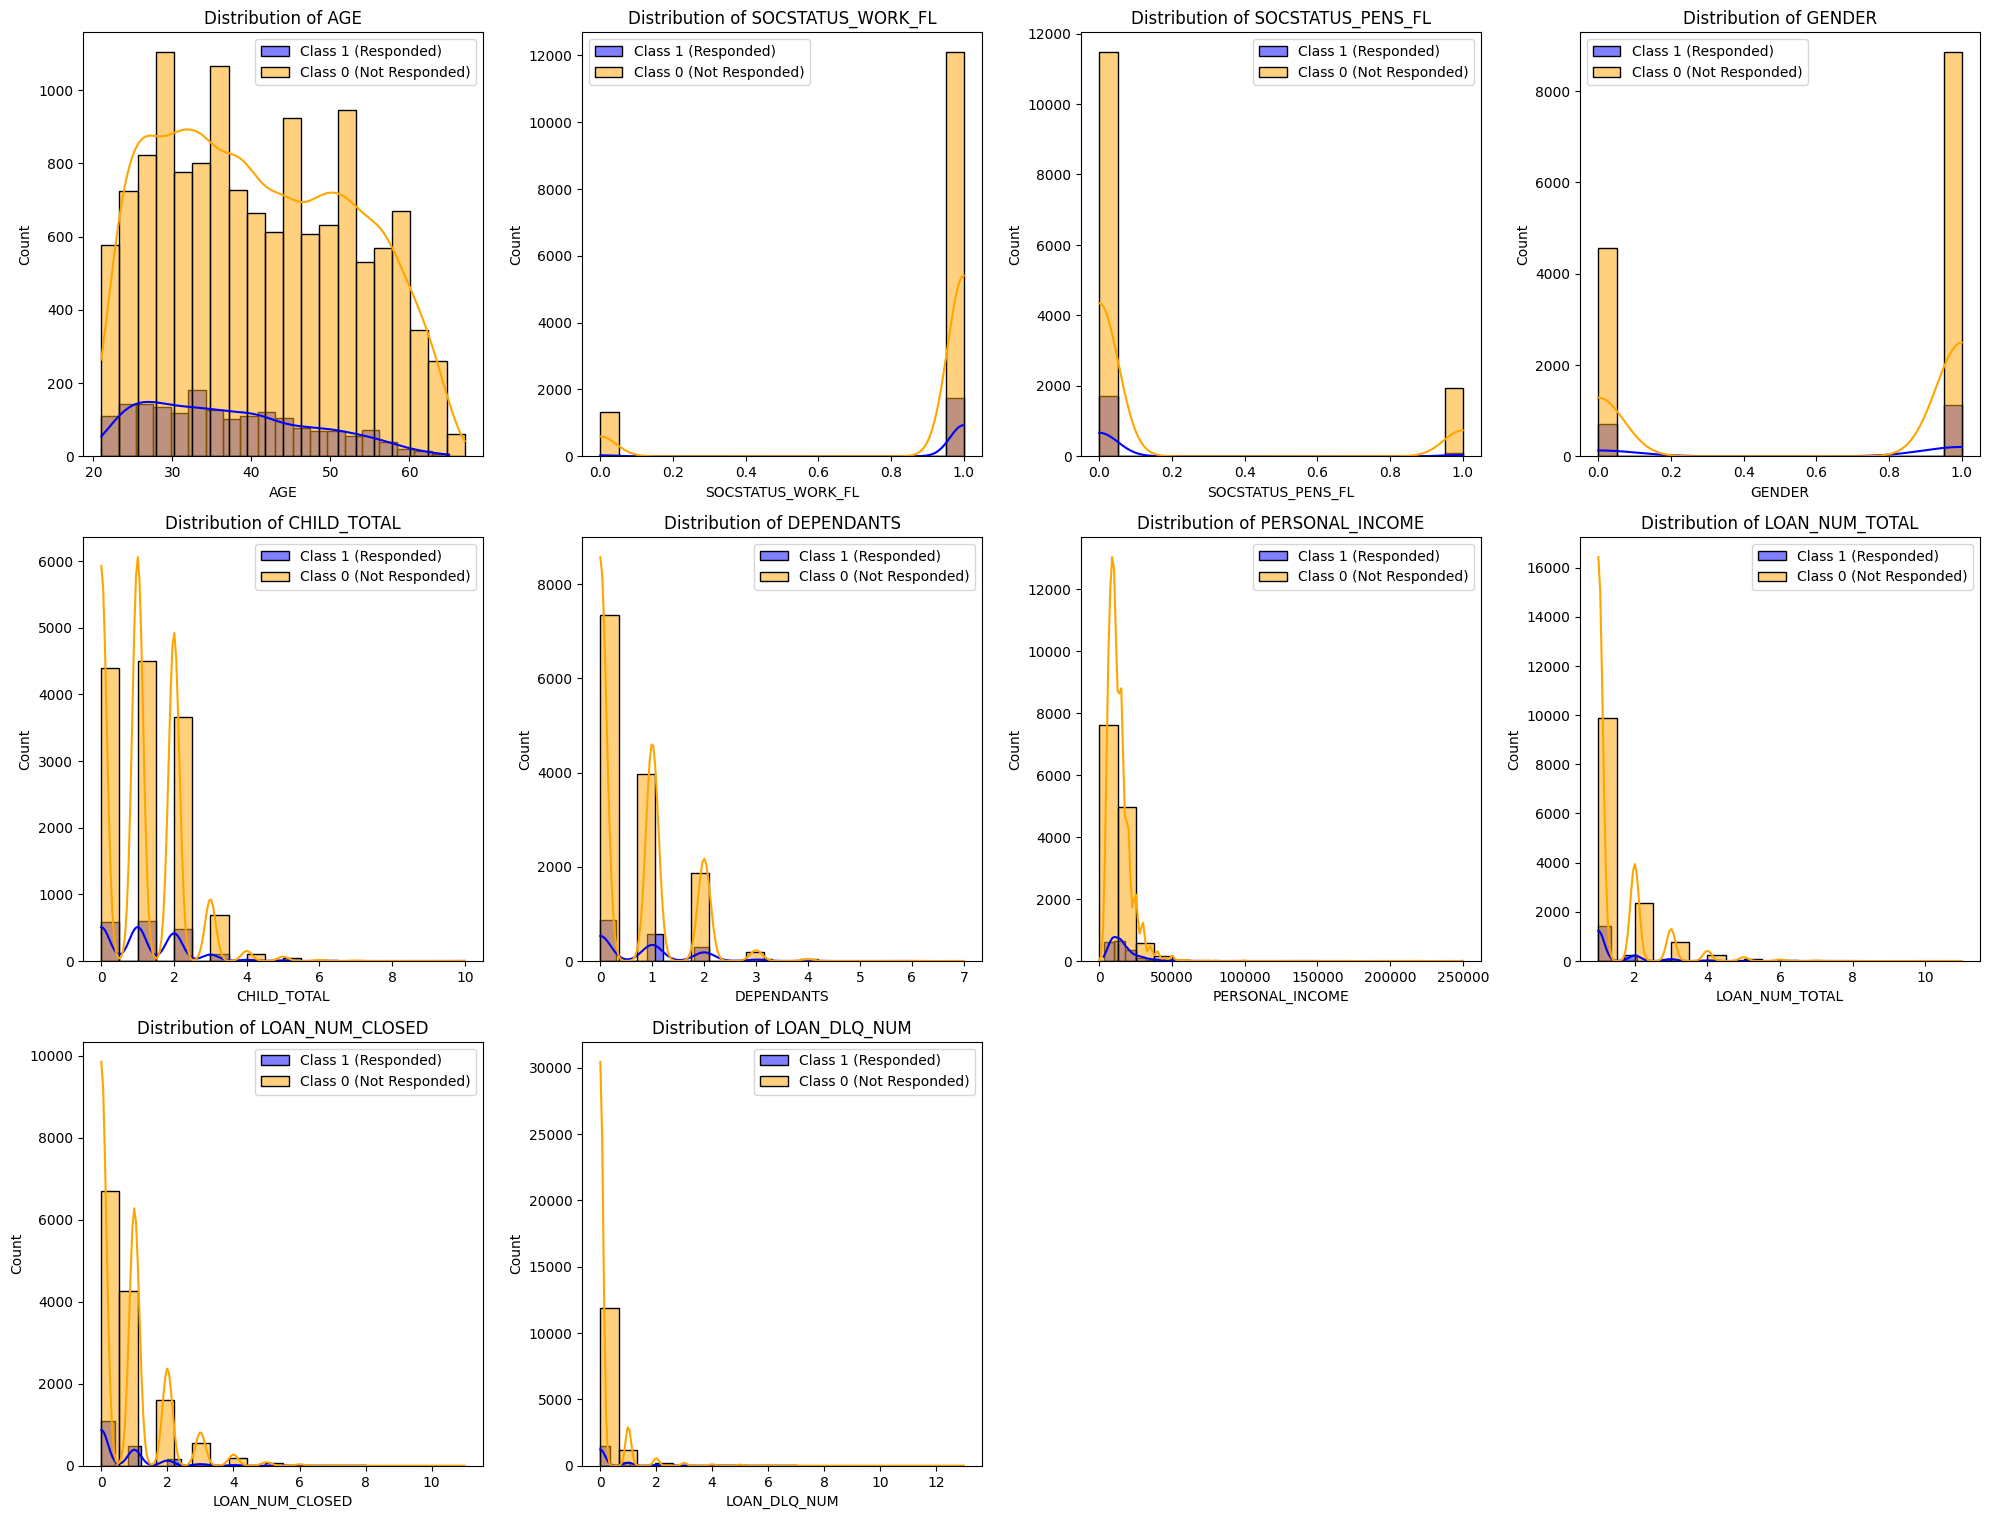

In [19]:
# Получим список всех признаков, кроме целевой переменной
all_features = [col for col in data.columns if col != 'TARGET']

# Разделение данных на клиентов с откликом и без отклика
data_class_1 = data[data['TARGET'] == 1]  # Класс 1 (с откликом)
data_class_0 = data[data['TARGET'] == 0]  # Класс 0 (без отклика)

# Анализ клиентов с откликами (TARGET = 1)
# Посмотрим распределение всех признаков для клиентов с откликом
plt.figure(figsize=(20, 30))
for i, feature in enumerate(all_features, 1):
    plt.subplot(6, 4, i)  # Разбиваем на 6 строк и 4 столбца для удобства отображения
    sns.histplot(data=data_class_1, x=feature, kde=True, bins=20, color='blue', label='Class 1 (Responded)')
    sns.histplot(data=data_class_0, x=feature, kde=True, bins=20, color='orange', label='Class 0 (Not Responded)', alpha=0.5)
    plt.title(f'Distribution of {feature}')
    plt.legend()
plt.tight_layout()
plt.show()


### Анализ на основе графиков:

1. **`AGE` (Возраст)**:
   - Клиенты с откликами (класс `1`) имеют пик в возрасте от 20 до 50 лет.
   - Распределение клиентов без откликов (класс `0`) более равномерное и включает больше клиентов старше 50 лет.

2. **`SOCSTATUS_WORK_FL` (Социальный статус: работает или нет)**:
   - Клиенты с откликами в основном работают, что подчёркивает важность этого признака для модели.

3. **`SOCSTATUS_PENS_FL` (Социальный статус: пенсионер или нет)**:
   - Пенсионеры реже откликаются на предложения, и их значительно больше среди класса `0`.

4. **`GENDER` (Пол)**:
   - Распределение по полу не даёт существенных различий между классами `0` и `1`. Это подтверждает, что пол не является значимым признаком для модели.

5. **`CHILD_TOTAL` и `DEPENDANTS`**:
   - Большинство клиентов с откликами имеют 0–2 детей и 0–1 иждивенцев. Многодетные семьи встречаются крайне редко среди класса `1`.

6. **`PERSONAL_INCOME` (Личный доход)**:
   - Клиенты с доходом более 30,000 редко откликаются на предложения, в то время как большинство клиентов с откликами имеют доход в пределах 10,000–30,000.

7. **`LOAN_NUM_TOTAL` и `LOAN_NUM_CLOSED` (Общее количество ссуд и количество закрытых ссуд)**:
   - Большинство клиентов с откликами имеют 0–2 ссуды. Большее количество ссуд связано с уменьшением вероятности отклика.

8. **`LOAN_DLQ_NUM` (Количество просрочек)**:
   - Большинство клиентов с откликами не имеют просрочек (0–1). Клиенты с большим количеством просрочек практически не откликаются.

**Удалим выбросы.**

In [20]:
print(len(data[(data.LOAN_DLQ_NUM > 5)]))
print(len(data[(data.LOAN_NUM_CLOSED > 4)]))
print(len(data[(data.LOAN_NUM_TOTAL > 5)]))
print(len(data[(data.PERSONAL_INCOME > 60000)]))
print(len(data[(data.DEPENDANTS > 3)]))
print(len(data[(data.CHILD_TOTAL > 4)]))

43
96
54
29
52
80


In [21]:
print(len(data_class_1[(data_class_1.LOAN_DLQ_NUM > 5)]))
print(len(data_class_1[(data_class_1.LOAN_NUM_CLOSED > 4)]))
print(len(data_class_1[(data_class_1.LOAN_NUM_TOTAL > 5)]))
print(len(data_class_1[(data_class_1.PERSONAL_INCOME > 60000)]))
print(len(data_class_1[(data_class_1.DEPENDANTS > 3)]))
print(len(data_class_1[(data_class_1.CHILD_TOTAL > 4)]))

5
7
5
8
13
13


In [22]:
data.drop(data[(data['LOAN_DLQ_NUM'] > 5) | (data['PERSONAL_INCOME'] > 60000) | (data['DEPENDANTS'] > 3) | (data['LOAN_NUM_CLOSED'] > 4) | (data['LOAN_NUM_TOTAL'] > 5) | (data['CHILD_TOTAL'] > 3)].index, inplace=True)
# data.drop(data[(data['LOAN_DLQ_NUM'] > 2) | (data['PERSONAL_INCOME'] > 50000) | (data['DEPENDANTS'] > 2) | (data['LOAN_NUM_CLOSED'] > 3) | (data['LOAN_NUM_TOTAL'] > 4) | (data['CHILD_TOTAL'] > 3)].index, inplace=True)

Удаление большего количества выбросов показало немного более худшие результаты.

In [23]:
print(len(data))

14839


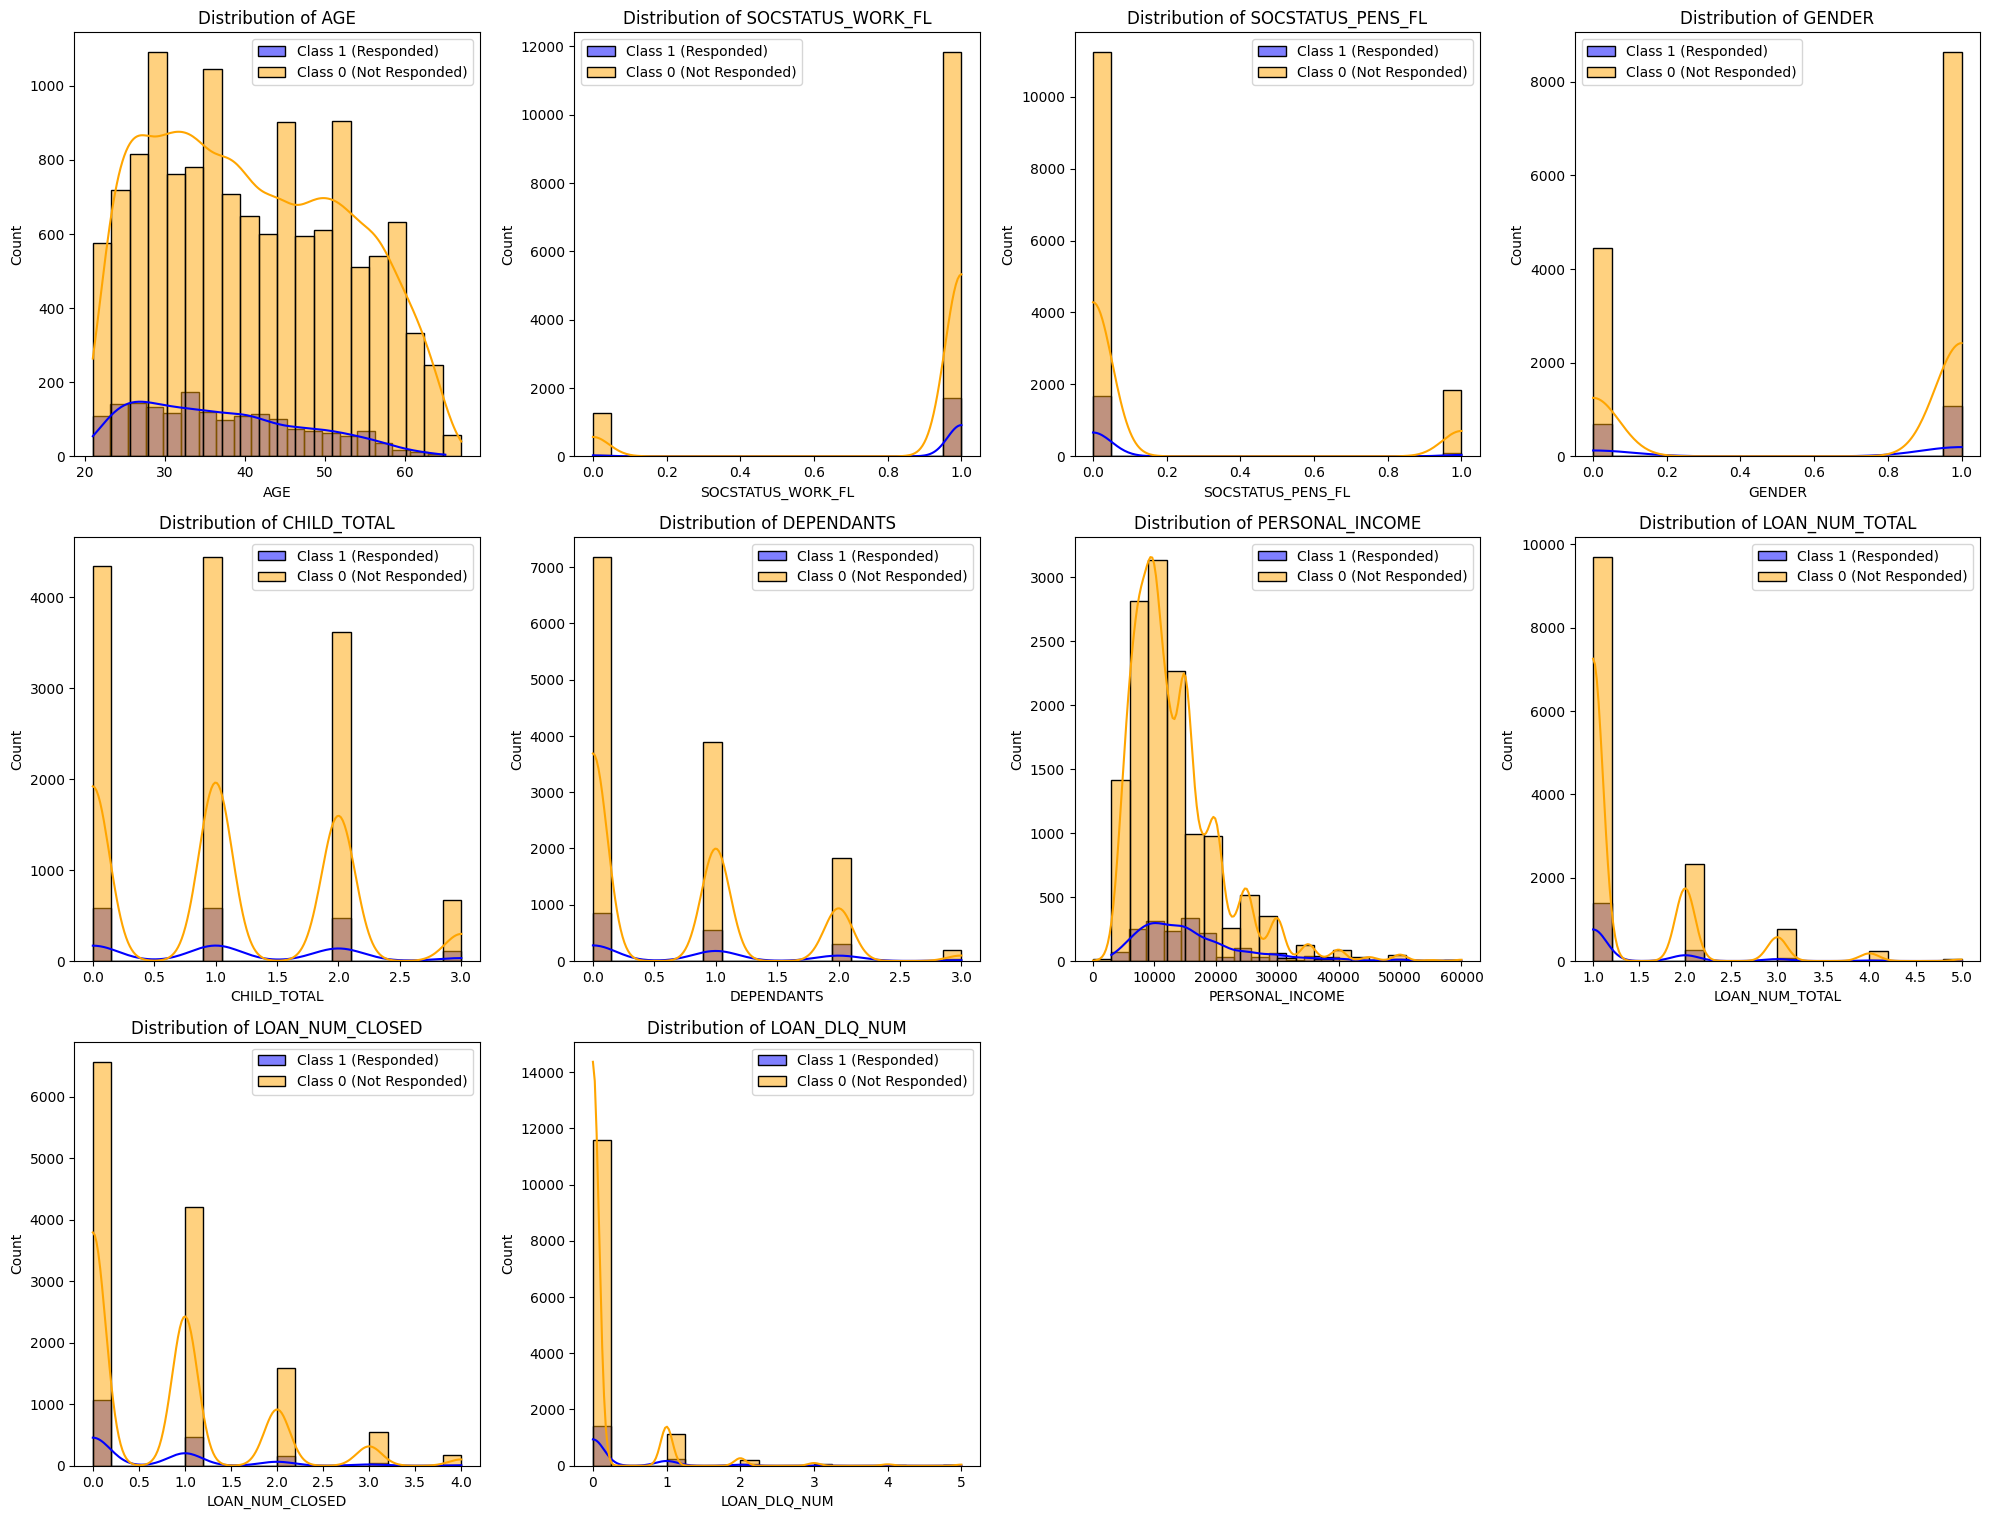

In [24]:
# Разделение данных на клиентов с откликом и без отклика
data_class_1 = data[data['TARGET'] == 1]  # Класс 1 (с откликом)
data_class_0 = data[data['TARGET'] == 0]  # Класс 0 (без отклика)

# Анализ клиентов с откликами (TARGET = 1)
# Посмотрим распределение всех признаков для клиентов с откликом
plt.figure(figsize=(20, 30))
for i, feature in enumerate(all_features, 1):
    plt.subplot(6, 4, i)  # Разбиваем на 6 строк и 4 столбца для удобства отображения
    sns.histplot(data=data_class_1, x=feature, kde=True, bins=20, color='blue', label='Class 1 (Responded)')
    sns.histplot(data=data_class_0, x=feature, kde=True, bins=20, color='orange', label='Class 0 (Not Responded)', alpha=0.5)
    plt.title(f'Distribution of {feature}')
    plt.legend()
plt.tight_layout()
plt.show()

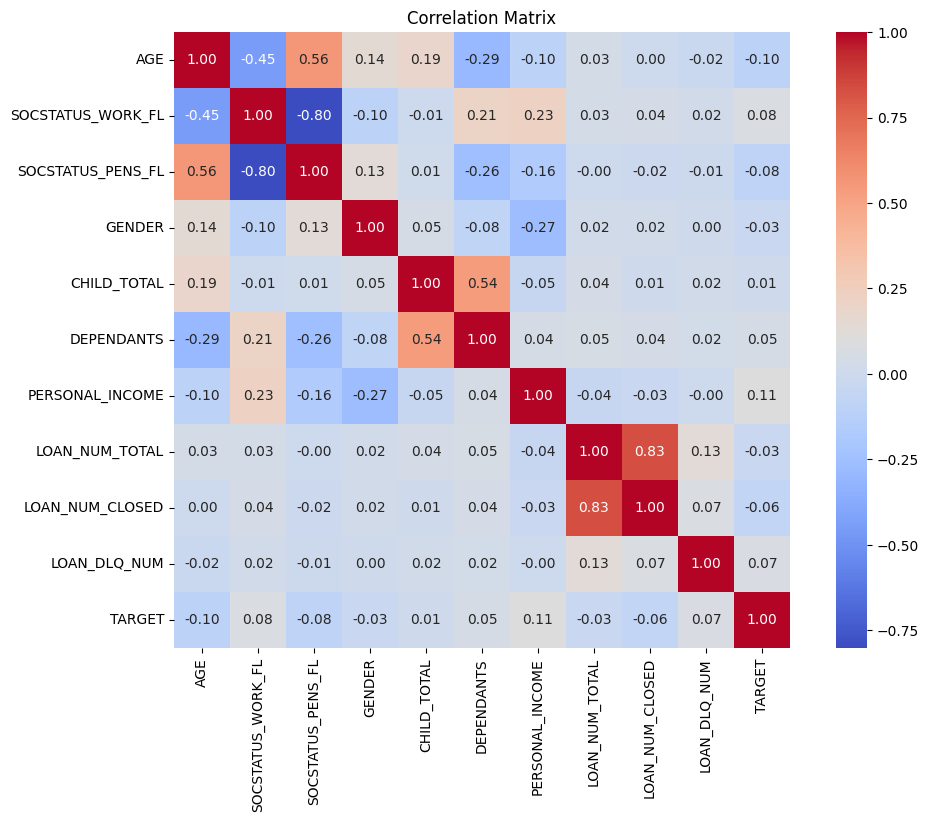

In [25]:
# Построение матрицы корреляции
correlation_matrix = data.corr()

# Настройка размера графика
plt.figure(figsize=(12, 8))

# Построение тепловой карты корреляции
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)

# Заголовок и отображение
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# data = data.drop(['CHILD_TOTAL'], axis=1)
# data = data.drop(['SOCSTATUS_PENS_FL'], axis=1)

Удаление сильно коррелирующих данных показало чуть более худшие результаты. Поэтому мы пропускаем такой шаг.   

### Построение модели с учетом выбросов.

In [28]:
# Определение признаков и целевой переменной
X = data.drop(columns=['TARGET'])  # Удаление целевой переменной
y = data['TARGET']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Построение модели логистической регрессии
model = LogisticRegression(max_iter=2000, class_weight='balanced')
model.fit(X_train_scaled, y_train)

# Оценка качества модели на тестовой выборке
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Метрики качества модели
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
mae_test = mean_absolute_error(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"MAE (Test): {mae_test:.4f}")

# Полный отчет по классификации
print("Classification Report:\n", classification_report(y_test, y_pred))

# Сохраняем данные.
results = {
    'Model': ['Data reduction'],
    'Accuracy': [accuracy],
    'MAE (Test)': [mae_test],
    'ROC-AUC': [roc_auc]
}
new_data = pd.DataFrame(results)
score_data = pd.concat([score_data, new_data], ignore_index=True)


Accuracy: 0.5964
ROC-AUC: 0.6481
MAE (Test): 0.4609
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.59      0.72      2616
           1       0.17      0.63      0.27       352

    accuracy                           0.60      2968
   macro avg       0.55      0.61      0.50      2968
weighted avg       0.83      0.60      0.67      2968



### Построение модели с отбором признаков через RFE

In [30]:
from sklearn.feature_selection import RFE

# Определение признаков и целевой переменной на основе чистых данных
clean_features = [col for col in data.columns if col != 'TARGET']  # Все признаки, кроме целевой переменной
X_clean = data[clean_features]
y_clean = data['TARGET']

# Нормализация данных
scaler_clean = StandardScaler()
X_clean_scaled = scaler_clean.fit_transform(X_clean)

# Создание модели логистической регрессии
model_clean = LogisticRegression(max_iter=2000)

# Применение RFE для отбора признаков
selector_clean = RFE(model_clean, n_features_to_select=5, step=1)  # Оставляем 5 лучших признаков
selector_clean.fit(X_clean_scaled, y_clean)

# Получение выбранных признаков
selected_features_clean = X_clean.columns[selector_clean.support_]
print(f"Лучшие признаки по RFE (на чистых данных): {selected_features_clean}")

# Оценка модели на отобранных признаках
X_selected_clean = X_clean[selected_features_clean]
X_train_sel_clean, X_test_sel_clean, y_train_sel_clean, y_test_sel_clean = train_test_split(X_selected_clean, y_clean, test_size=0.2, random_state=42)

# Нормализация отобранных признаков
X_train_sel_clean_scaled = scaler_clean.fit_transform(X_train_sel_clean)
X_test_sel_clean_scaled = scaler_clean.transform(X_test_sel_clean)

# Обучение модели на отобранных признаках
model_rfe_clean_final = LogisticRegression(max_iter=2000, class_weight='balanced')
model_rfe_clean_final.fit(X_train_sel_clean_scaled, y_train_sel_clean)

# Оценка модели на тестовой выборке
y_pred_clean_rfe = model_rfe_clean_final.predict(X_test_sel_clean_scaled)
y_pred_proba_clean_rfe = model_rfe_clean_final.predict_proba(X_test_sel_clean_scaled)[:, 1]
mae_test_clean_rfe = mean_absolute_error(y_pred_clean_rfe, y_pred_proba_clean_rfe)

# Метрики качества модели
accuracy_clean_rfe = accuracy_score(y_test_sel_clean, y_pred_clean_rfe)
roc_auc_clean_rfe = roc_auc_score(y_test_sel_clean, y_pred_proba_clean_rfe)
print(f"Accuracy (на чистых данных): {accuracy_clean_rfe:.4f}")
print(f"ROC-AUC (на чистых данных): {roc_auc_clean_rfe:.4f}")
print(f"MAE (Test) (на чистых данных): {mae_test_clean_rfe:.4f}")
print("Classification Report (на чистых данных):\n", classification_report(y_test_sel_clean, y_pred_clean_rfe))

# Сохраняем данные.
results = {
    'Model': ['RFE'],
    'Accuracy': [accuracy_clean_rfe],
    'MAE (Test)': [mae_test_clean_rfe],
    'ROC-AUC': [roc_auc_clean_rfe]
}
new_data = pd.DataFrame(results)
score_data = pd.concat([score_data, new_data], ignore_index=True)



Лучшие признаки по RFE (на чистых данных): Index(['AGE', 'SOCSTATUS_PENS_FL', 'PERSONAL_INCOME', 'LOAN_NUM_TOTAL',
       'LOAN_NUM_CLOSED'],
      dtype='object')
Accuracy (на чистых данных): 0.5792
ROC-AUC (на чистых данных): 0.6494
MAE (Test) (на чистых данных): 0.3944
Classification Report (на чистых данных):
               precision    recall  f1-score   support

           0       0.92      0.57      0.71      2636
           1       0.16      0.63      0.25       332

    accuracy                           0.58      2968
   macro avg       0.54      0.60      0.48      2968
weighted avg       0.84      0.58      0.66      2968



In [32]:
# Визуализация обновленного DataFrame с результатами
styled_data = score_data.style \
    .background_gradient(cmap='YlOrRd', subset=['Accuracy', 'ROC-AUC']) \
    .format({
        #'MAE (Train)': '{:,.2f}', 'RMSE (Train)': '{:,.2f}', 'R^2 (Train)': '{:.4f}',
        'Accuracy': '{:,.4f}', 'MAE (Test)': '{:,.4f}', 'ROC-AUC': '{:.4f}'
    }) \
    .highlight_max(color='lightgreen', subset=['Accuracy']) \
    .highlight_min(color='lightcoral', subset=['ROC-AUC', 'MAE (Test)'])

# Отображение обновленной таблицы
styled_data

,Model,Accuracy,MAE (Test),ROC-AUC
0,Simple,0.8808,0.2038,0.6390
1,Balanced & Scaled,0.5869,0.4634,0.6429
2,Data reduction,0.5964,0.4609,0.6481
3,RFE,0.5792,0.3944,0.6494
4,Data reduction,0.5964,0.4609,0.6481
5,RFE,0.5792,0.3944,0.6494


### Выводы по сравнению моделей

#### 1. **Простая модель без стандартизации и балансировки**
- **Accuracy**: 0.8808
- **ROC-AUC**: 0.6392
- **MAE**: 0.2038
- **Проблемы**:
  - Модель хорошо предсказывает класс `0`, так как он преобладает в данных. Однако модель совершенно не предсказывает класс `1` (Precision и Recall для класса `1` равны 0).
  - Высокое значение Accuracy обусловлено дисбалансом классов, что делает модель предвзятой в пользу класса `0`.
  - ROC-AUC (0.6392) указывает на низкую способность модели различать классы.

#### 2. **Модель с балансировкой классов и стандартизацией**
- **Accuracy**: 0.5869
- **ROC-AUC**: 0.6429
- **MAE**: 0.4634
- **Проблемы**:
  - Accuracy значительно снизилась, так как модель больше не игнорирует класс `1`.
  - Precision для класса `1` улучшился (17%), однако Recall также остаётся низким.
  - MAE увеличилось, что указывает на то, что модель хуже справляется с предсказанием.

#### 3. **Модель с удалением выбросов (небольшое количество)**
- **Accuracy**: 0.5964
- **ROC-AUC**: 0.6481
- **MAE**: 0.4609
- **Проблемы**:
  - Удаление небольшого количества выбросов улучшило Accuracy и ROC-AUC, но незначительно.
  - Удаление выбросов не решило проблемы дисбаланса классов, Precision для класса `1` остался на уровне 17%.

#### 4. **Модель с отбором признаков через RFE**
- **Accuracy**: 0.5792
- **ROC-AUC**: 0.6494
- **MAE**: 0.3944
- **Проблемы**:
  - Использование метода отбора признаков RFE улучшило ROC-AUC до 0.6494, но Accuracy и MAE остались на уровне моделей с удалением выбросов.
  - Это указывает на то, что даже после отбора признаков модель не может захватить скрытые зависимости между признаками и целевой переменной.

### Основные выводы:

1. **Высокий показатель Accuracy в простой модели**:
   - Он обусловлен тем, что модель предсказывает только класс `0`. Модель практически не предсказывает класс `1`, поэтому Precision и Recall для класса `1` равны 0.

2. **Снижение Accuracy и увеличение MAE при балансировке**:
   - Снижение Accuracy связано с тем, что модель стала учитывать класс `1` и больше не предвзята в пользу класса `0`.
   - Увеличение MAE указывает на то, что модель делает больше ошибок при предсказании класса `1`.

3. **Удаление выбросов и отбор признаков через RFE**:
   - Удаление небольшого количества выбросов и отбор признаков с помощью RFE улучшили ROC-AUC, но не решают проблему низкого Precision и Recall для класса `1`.
   - Это указывает на то, что линейная модель не может уловить сложные зависимости в данных.

4. **Лучший ROC-AUC при использовании RFE**:
   - На чистых данных с отбором признаков (модель 4) ROC-AUC = 0.6494. Это лучшее значение по сравнению с другими моделями.
   - Однако значение всё ещё низкое, что указывает на необходимость использования более сложных моделей.

### Что можно сделать еще?

1. **Попробовать более сложные модели**:
   - Линейная регрессия ограничена в своих возможностях. Можно попробовать другие модели, такие как Decision Tree, Random Forest, XGBoost, которые могут лучше справляться с дисбалансом и скрытыми зависимостями.

2. **Дополнительные признаки и взаимодействия**:
   - Создание дополнительных признаков на основе взаимодействий текущих признаков может помочь улучшить линейную модель. Например, `AGE * PERSONAL_INCOME`, `LOAN_NUM_CLOSED / LOAN_NUM_TOTAL`.

3. **Использование регуляризации**:
   - Применение регуляризации (Lasso, Ridge) может улучшить результаты линейной модели за счёт уменьшения влияния менее значимых признаков.

### Объединённая двухступенчатая модель CatBoost (В качестве эксперимента).

In [33]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 10.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 11.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 10.9 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.3
    Uninstalling numpy-2.2.3:
      Successfully uninstalled numpy-2.2.3


In [40]:
import catboost

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [39]:
from catboost import CatBoostClassifier

# Разделение данных на признаки и целевую переменную
X = data.drop(columns=['TARGET'])  # Убедитесь, что в 'data' уже нет лишних столбцов
y = data['TARGET']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Шаг 1: Первая модель CatBoost (максимизация Recall)
model_stage1 = CatBoostClassifier(iterations=500, depth=6, class_weights=[1, 5], learning_rate=0.1, random_state=42, verbose=False)
model_stage1.fit(X_train, y_train)

# Прогнозирование первой моделью на тестовой выборке
y_pred_stage1 = model_stage1.predict(X_test)
y_pred_proba_stage1 = model_stage1.predict_proba(X_test)[:, 1]

# Оценка первой модели
accuracy_stage1 = accuracy_score(y_test, y_pred_stage1)
roc_auc_stage1 = roc_auc_score(y_test, y_pred_proba_stage1)
print(f"Accuracy первой модели: {accuracy_stage1:.4f}")
print(f"ROC-AUC первой модели: {roc_auc_stage1:.4f}")
print("Classification Report первой модели:\n", classification_report(y_test, y_pred_stage1))

# Отбор клиентов, для которых модель предсказала класс 1
X_stage2 = X_test[y_pred_stage1 == 1]
y_stage2 = y_test[y_pred_stage1 == 1]

# Шаг 2: Вторая модель CatBoost (уточнение предсказаний)
model_stage2 = CatBoostClassifier(iterations=500, depth=6, class_weights=[1, 7], learning_rate=0.01, random_state=42, verbose=False)
model_stage2.fit(X_stage2, y_stage2)

# Прогнозирование второй моделью на выбранных данных
y_pred_stage2 = model_stage2.predict(X_stage2)
y_pred_proba_stage2 = model_stage2.predict_proba(X_stage2)[:, 1]

# Оценка второй модели
accuracy_stage2 = accuracy_score(y_stage2, y_pred_stage2)
roc_auc_stage2 = roc_auc_score(y_stage2, y_pred_proba_stage2)
print(f"Accuracy второй модели: {accuracy_stage2:.4f}")
print(f"ROC-AUC второй модели: {roc_auc_stage2:.4f}")
print("Classification Report второй модели:\n", classification_report(y_stage2, y_pred_stage2))

# Окончательные предсказания объединённой двухступенчатой модели
final_pred = np.zeros_like(y_pred_stage1)
final_pred[y_pred_stage1 == 1] = y_pred_stage2  # Используем уточнённые предсказания для клиентов с откликами
final_pred[y_pred_stage1 == 0] = 0  # Оставляем класс 0 для остальных клиентов

# Оценка объединённой двухступенчатой модели
accuracy_final = accuracy_score(y_test, final_pred)
roc_auc_final = roc_auc_score(y_test, y_pred_proba_stage1)  # Используем вероятности первой модели
print(f"Accuracy объединённой двухступенчатой модели: {accuracy_final:.4f}")
print(f"ROC-AUC объединённой двухступенчатой модели: {roc_auc_final:.4f}")
print("Classification Report объединённой модели:\n", classification_report(y_test, final_pred))


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

**Анализ метрик:**
   - **Первая модель CatBoost (Stage 1):**
     - Высокое значение Accuracy (0.7877), но низкий Precision и Recall для класса `1` (слабое различение классов).
   - **Вторая модель CatBoost (Stage 2):**
     - Очень высокий ROC-AUC (0.8984), что указывает на лучшее различение откликов, но Accuracy низкое (0.5748).
   - **Объединённая двухступенчатая модель:**
     - Лучший баланс между метриками: Accuracy — 0.8497, приемлемое значение ROC-AUC (0.6306), и улучшенный Precision (0.30) для класса `1`.

**Вывод:**
   - **Наилучший выбор: Объединённая двухступенчатая модель CatBoost.**
     - Эта модель демонстрирует высокую общую точность (Accuracy 0.8497) и лучший баланс между Precision и Recall для класса `1`.
     - Вторая модель (Stage 2) успешно уточняет предсказания первой, что делает объединённую модель более точной.